<a href="https://colab.research.google.com/github/cloudhood/learning-basics/blob/main/notebooks/sim_zero_inflated_poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%load_ext rpy2.ipython

In [31]:
%%R
rzipois <- function (n=100, lambda=2, zi.prob=.2) {
    Y <- rpois(n, lambda)
    U <- sample(
        c(0, 1), 
        size = n, 
        prob = c(zi.prob, 1 - zi.prob), 
        replace = TRUE
    )
    U * Y 
}

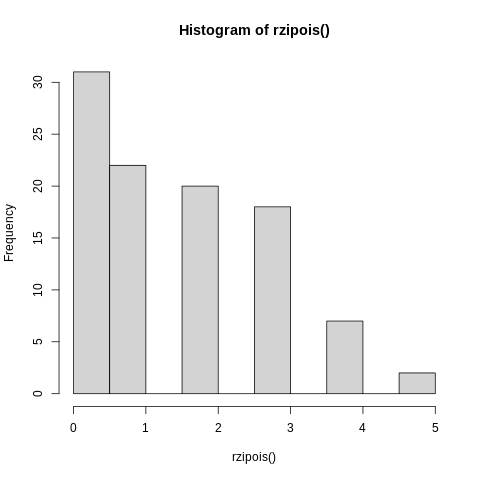

breaks,[RTYPES.REALSXP]
counts,[RTYPES.INTSXP]
density,[RTYPES.REALSXP]
mids,[RTYPES.REALSXP]
xname,[RTYPES.STRSXP]
equidist,[RTYPES.LGLSXP]


In [33]:
%R hist(rzipois())

In [4]:
import numpy as np

In [5]:
rng = np.random.default_rng(123)

In [35]:
def zpois(n=100, lam=2, p=0.2, rng=rng):
    Y = rng.poisson(lam, n)
    U = rng.choice([0, 1], size=n, replace=True, p=[p, 1-p])
    return np.multiply(Y, U)

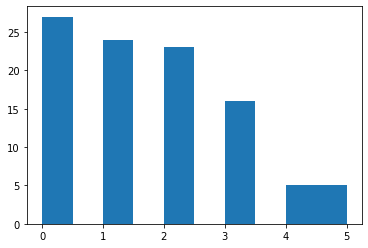

In [36]:
import matplotlib.pyplot as plt
plt.hist(zpois())
plt.show()